In [1]:
import lm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from test_trigram import learn_trigram
from test_bigram import learn_bigram
from data import *

In [19]:
dnames = ["brown", "reuters", "gutenberg"]
datas = []
models = []
# Learn the models for each of the domains, and evaluate it
for dname in dnames:
    print("-----------------------")
    print(dname)
    data = read_texts("data/corpora.tar.gz", dname)
    datas.append(data)
    model = learn_unigram(data)
    models.append(model)
# compute the perplexity of all pairs
n = len(dnames)
perp_dev = np.zeros((n,n))
perp_test = np.zeros((n,n))
perp_train = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        perp_dev[i][j] = models[i].perplexity(datas[j].dev)
        perp_test[i][j] = models[i].perplexity(datas[j].test)
        perp_train[i][j] = models[i].perplexity(datas[j].train)

print("-------------------------------")
print("x train")
print_table(perp_train, dnames, dnames, "table-train.tex")
print("-------------------------------")
print("x dev")
print_table(perp_dev, dnames, dnames, "table-dev.tex")
print("-------------------------------")
print("x test")
print_table(perp_test, dnames, dnames, "table-test.tex")

-----------------------
brown
brown  read. train: 39802 dev: 8437 test: 8533
vocab: 41747
train: 1595.9470925417734
dev  : 1829.4242641260457
test : 1851.1703130122082
sample:  this
sample:  life list to
sample:  popular wall They thought adjustments the information for to about pictures
-----------------------
reuters
reuters  read. train: 38183 dev: 8083 test: 8199
vocab: 35990
train: 1522.6834303392516
dev  : 1640.1097143194893
test : 1635.9562090707116
sample:  is to credit RATE they nine of would focusing of 774 cts Soviet 14 bigger and Champion
sample:  credit 1985 to of TO 1987 said Company Dlrs immediate shares divided
sample:  subject 157 prior Ottawa
-----------------------
gutenberg
gutenberg  read. train: 68767 dev: 14667 test: 14861
vocab: 43737
train: 1025.3264410610939
dev  : 1107.422636278556
test : 1081.5818157177077
sample:  viewed soldiers husband 50 to down commanded of Syria the stepped was be all over it that remember
sample:  darkness
sample:  struggles chastise 

In [2]:
def train_lm(base, smooth, mode='bi', comp_other=False):
    if mode == 'bi':
        learn_func = learn_bigram
    elif mode == 'tri':
        learn_func = learn_trigram
        
    dnames = ["brown", "reuters", "gutenberg"]
    datas = []
    models = {b:defaultdict(list) for b in base}
    # Learn the models for each of the domains, and evaluate it
    for dname in dnames:
        print("-----------------------")
        print(dname)
        data = read_texts("data/corpora.tar.gz", dname)
        datas.append(data)
        
        for b in base:
            for s in smooth:
                model = learn_func(data, gamma=b, smooth=s)
                models[b][s].append(model)
                
    if comp_other:
        # compute the perplexity of all pairs
        n = len(dnames)
        perp_dev = np.zeros((n,n))
        perp_test = np.zeros((n,n))
        perp_train = np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                perp_dev[i][j] = models[i].perplexity(datas[j].dev)
                perp_test[i][j] = models[i].perplexity(datas[j].test)
                perp_train[i][j] = models[i].perplexity(datas[j].train)

        print("-------------------------------")
        print("x train")
        print_table(perp_train, dnames, dnames, "table-train.tex")
        print("-------------------------------")
        print("x dev")
        print_table(perp_dev, dnames, dnames, "table-dev.tex")
        print("-------------------------------")
        print("x test")
        print_table(perp_test, dnames, dnames, "table-test.tex")
    
    return models, datas

In [6]:
smooth = np.linspace(0.1, 1, 10)

In [4]:
bimodels_0, datas = train_lm([0], smooth)

-----------------------
brown
brown  read. train: 39802 dev: 8437 test: 8533
-----------------------
reuters
reuters  read. train: 38183 dev: 8083 test: 8199
-----------------------
gutenberg
gutenberg  read. train: 68767 dev: 14667 test: 14861


In [6]:
print(bimodels_0)

{0: defaultdict(<class 'list'>, {0.1: [<lm.Bigram object at 0x0000025AFF482288>, <lm.Bigram object at 0x0000025AB0BB2548>, <lm.Bigram object at 0x0000025AFFCBCAC8>], 0.2: [<lm.Bigram object at 0x0000025AFF482D08>, <lm.Bigram object at 0x0000025AB0BB2448>, <lm.Bigram object at 0x0000025AFFC4FF48>], 0.30000000000000004: [<lm.Bigram object at 0x0000025AFF482308>, <lm.Bigram object at 0x0000025AB0BB2908>, <lm.Bigram object at 0x0000025AFFCBC948>], 0.4: [<lm.Bigram object at 0x0000025AFF482FC8>, <lm.Bigram object at 0x0000025AB0BB2C88>, <lm.Bigram object at 0x0000025AFFCBCE08>], 0.5: [<lm.Bigram object at 0x0000025AFF482B08>, <lm.Bigram object at 0x0000025AB0BB2048>, <lm.Bigram object at 0x0000025AFFCBC108>], 0.6: [<lm.Bigram object at 0x0000025AFF482DC8>, <lm.Bigram object at 0x0000025AB0BB2BC8>, <lm.Bigram object at 0x0000025AFFCBC608>], 0.7000000000000001: [<lm.Bigram object at 0x0000025AFF482808>, <lm.Bigram object at 0x0000025AB0BB2EC8>, <lm.Bigram object at 0x0000025AFFCBC648>], 0.8: 

In [3]:
def comp(base, smooth, datas, models):
    # compute the perplexity of all pairs
    bnum = len(base)
    snum = len(smooth)
    perp_dev = np.zeros((bnum, snum, 3,3))
    perp_test = np.zeros((bnum, snum, 3,3))
    perp_train = np.zeros((bnum, snum, 3,3))
    
    for bi, b in enumerate(base):
        for si, s in enumerate(smooth):
            for i in range(3):
                for j in range(3):
                    perp_dev[bi,si,i,j] = models[b][s][i].perplexity(datas[j].dev)
                    perp_test[bi,si,i,j] = models[b][s][i].perplexity(datas[j].test)
                    perp_train[bi,si,i,j] = models[b][s][i].perplexity(datas[j].train)

#     print("-------------------------------")
#     print("x train")
#     print_table(perp_train, dnames, dnames, "table-train.tex")
#     print("-------------------------------")
#     print("x dev")
#     print_table(perp_dev, dnames, dnames, "table-dev.tex")
#     print("-------------------------------")
#     print("x test")
#     print_table(perp_test, dnames, dnames, "table-test.tex")
    return perp_dev, perp_test, perp_train

In [6]:
perp = comp([0], smooth, datas, bimodels_0)

In [9]:
print(perp[0][0,:,0,0])

[3794.83356135 4795.40425634 5577.73281865 6241.02797914 6825.44963312
 7352.22512987 7834.28373878 8280.23747099 8696.18873248 9086.6623328 ]


In [2]:
with open('bi_smooth01_0.pickle', 'rb') as f:
    bi_smooth = pickle.load(f)

In [8]:
trimodels_0, datas = train_lm([0], smooth, mode='tri')

-----------------------
brown
brown  read. train: 39802 dev: 8437 test: 8533
-----------------------
reuters
reuters  read. train: 38183 dev: 8083 test: 8199
-----------------------
gutenberg
gutenberg  read. train: 68767 dev: 14667 test: 14861


In [3]:
with open('bi_smooth01_0_perp.pickle', 'rb') as f:
    bi_smooth_perp = pickle.load(f)

In [9]:
tri_perp_0 = comp([0], smooth, datas, trimodels_0)

In [4]:
with open('tri_smooth01_0.pickle', 'rb') as f:
    tri_smooth = pickle.load(f)

In [15]:
print(tri_perp_0[1][0,0,:,:])

[[  6606.70106985  58764.94759596  12543.92691031]
 [ 24877.76930285   2424.40951808  53380.90804048]
 [ 15320.55666234 148587.15732586   3100.74838629]]


In [5]:
with open('tri_smooth01_0_perp.pickle', 'rb') as f:
    tri_smooth_perp = pickle.load(f)

In [45]:
perp = [perp_dev, perp_test, perp_train]

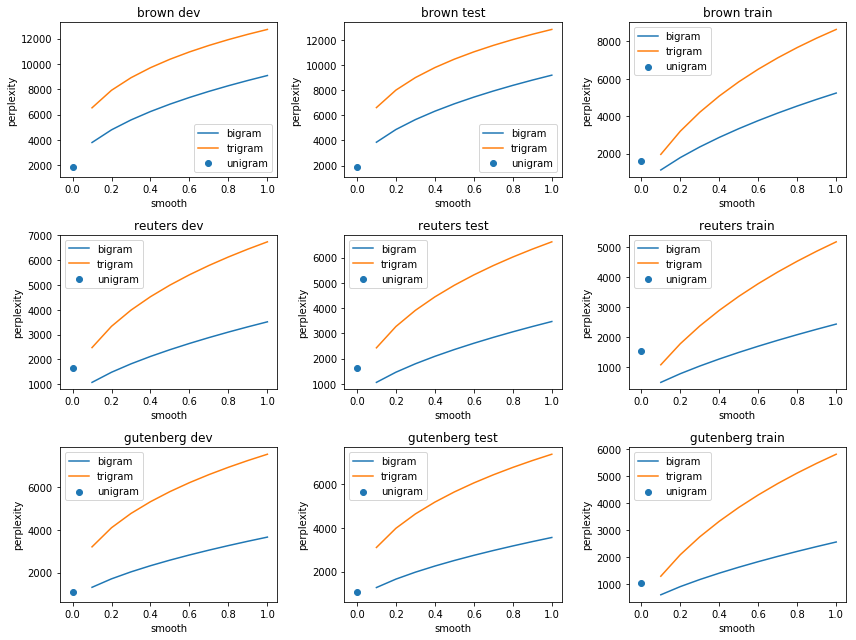

In [68]:
fig, ax = plt.subplots(3,3, figsize=(12,9))
for i, dname in enumerate(dnames):
    for j, s in enumerate(['dev', 'test', 'train']):
        ax[i,j].plot(smooth, bi_smooth_perp[j][0,:,i,i], label='bigram')
        ax[i,j].plot(smooth, tri_smooth_perp[j][0,:,i,i], label='trigram')
        ax[i,j].scatter([0], perp[j][i,i], label='unigram')
        ax[i,j].set_title(f'{dname} {s}')
        ax[i,j].legend()
        ax[i,j].set_xlabel('smooth')
        ax[i,j].set_ylabel('perplexity')
plt.tight_layout()
plt.savefig('graph/smooth')

In [73]:
base = np.arange(6)

In [8]:
base

array([0, 1, 2, 3, 4, 5])

In [9]:
trimodels_s01, datas = train_lm(base, [0.1], mode='tri')

-----------------------
brown
brown  read. train: 39802 dev: 8437 test: 8533
-----------------------
reuters
reuters  read. train: 38183 dev: 8083 test: 8199
-----------------------
gutenberg
gutenberg  read. train: 68767 dev: 14667 test: 14861


In [10]:
bimodels_s01, datas = train_lm(base, [0.1], mode='bi')

-----------------------
brown
brown  read. train: 39802 dev: 8437 test: 8533
-----------------------
reuters
reuters  read. train: 38183 dev: 8083 test: 8199
-----------------------
gutenberg
gutenberg  read. train: 68767 dev: 14667 test: 14861


In [69]:
with open('tri_base05_s01.pickle', 'rb') as f:
    tri_base = pickle.load(f)

In [70]:
with open('bi_base05_s01.pickle', 'rb') as f:
    bi_base = pickle.load(f)

In [13]:
tri_perp_s01 = comp(base, [0.1], datas, trimodels_s01)

In [14]:
bi_perp_s01 = comp(base, [0.1], datas, bimodels_s01)

In [71]:
with open('tri_base05_s01_perp.pickle', 'rb') as f:
    tri_base_perp = pickle.load(f)

In [72]:
with open('bi_base05_s01_perp.pickle', 'rb') as f:
    bi_base_perp = pickle.load(f)

In [18]:
print(tri_perp_s01[2][5,0,:,:])

[[ 1193.65010627 14589.17070323  4768.10050409]
 [ 9422.73078016   596.89654082 16499.05559174]
 [ 6093.28221968 32709.41182374   698.34243618]]


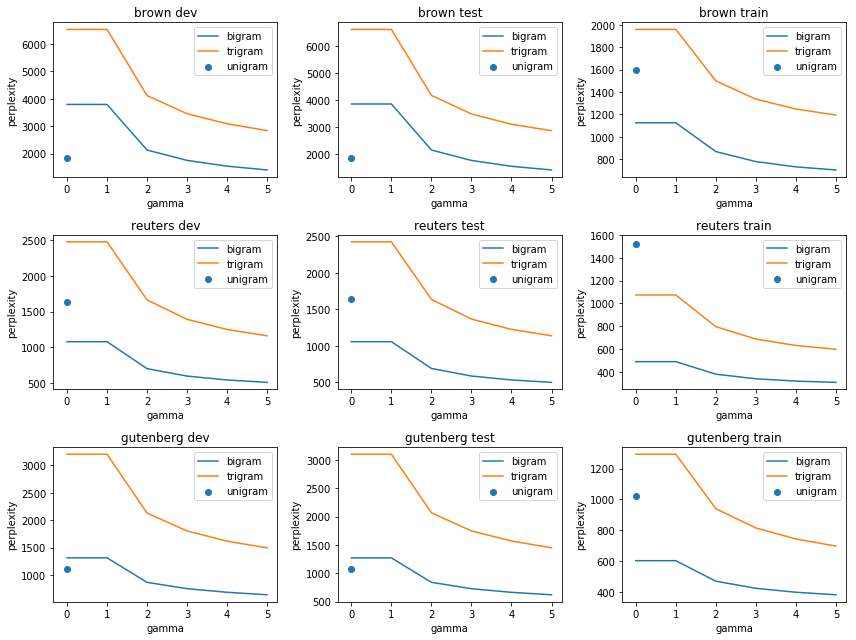

In [75]:
fig, ax = plt.subplots(3,3, figsize=(12,9))
for i, dname in enumerate(dnames):
    for j, s in enumerate(['dev', 'test', 'train']):
        ax[i,j].plot(base, bi_base_perp[j][:,0,i,i], label='bigram')
        ax[i,j].plot(base, tri_base_perp[j][:,0,i,i], label='trigram')
        ax[i,j].scatter([0], perp[j][i,i], label='unigram')
        ax[i,j].set_title(f'{dname} {s}')
        ax[i,j].legend()
        ax[i,j].set_xlabel('gamma')
        ax[i,j].set_ylabel('perplexity')
plt.tight_layout()
plt.savefig('graph/base')

In [76]:
tri_sent_model = tri_base[5][0.1]

In [77]:
bi_sent_model = bi_base[5][0.1]

In [80]:
from generator import Sampler
for i,dname in enumerate(dnames):
    
    print(f'{dname}')
    print('Unigram: ', " ".join(str(x) for x in Sampler(models[i]).sample_sentence(['they'])))
    print('Bigram: ', " ".join(str(x) for x in Sampler(bi_sent_model[i]).sample_sentence(['they'])))
    print('Trigram: ', " ".join(str(x) for x in Sampler(tri_sent_model[i]).sample_sentence(['they'])))

brown
Unigram:  they to dreamed in and seems to what
Bigram:  they aloof campaign shield bastards Pocket printing stockade rocks mating preparing learning Prize brightness feathered ties expandable creature space successes instances thus tools politician contacts Julie accelerated lectures customer audience 1865 practitioners 9th affection hearing discrete philosophical emotions utter stiff military locked officials laughter Columns wedding and governmental alarm ramp courts collecting temperatures reads note invariably shelter minute dreamed threatening fantasy hearings violently roles lack gospel piled AIA widow promised loans foil capacity of the prayer peace exhibit They don see corners deliver spitting pressure switches specimens impelled Grabski nuts Atlantic sets Less studied the UNK UNK Arts classified residents surveyed extremes
Trigram:  they hero planners totals Hospital pleaded tended than shirt denominations investigate ills microscope translate horns policy bottoms respon

In [104]:
len(set(models[0].vocab()) - set(bi_sent_model[2].vocab()))

31378

In [107]:
len(set(models[2].vocab()) - set(models[0].vocab()))

24185

In [105]:
len(set(models[2].vocab()) - set(bi_sent_model[0].vocab()))

34568

In [108]:
sent =  'resistant sergeant specified transducer gallons holster'.split()
print('Unigram: ', models[2].logprob_sentence(sent, 22195))
print('Bigram: ', bi_sent_model[2].logprob_sentence(sent, 31378))
print('Trigram: ', tri_sent_model[2].logprob_sentence(sent, 31378))

Unigram:  -151.62858087306654
Bigram:  -126.85925739964524
Trigram:  -127.2028055543232


In [99]:
sent =  'AMERICA acreage ARABIA exported Crandall tender'.split()
print('Unigram: ', models[1].logprob_sentence(sent, 0))
print('Bigram: ', bi_sent_model[1].logprob_sentence(sent, 24286))
print('Trigram: ', tri_sent_model[1].logprob_sentence(sent, 24286))

Unigram:  -93.54677341451466
Bigram:  -89.61580272186917
Trigram:  -89.95688985415785


In [113]:
sent =  'they found title stolen sighed Nehemiah cousins 88'.split()
print('Unigram: ', models[0].logprob_sentence(sent, 24185))
print('Bigram: ', bi_sent_model[0].logprob_sentence(sent, 34568))
print('Trigram: ', tri_sent_model[0].logprob_sentence(sent, 34568))

Unigram:  -132.34321819934127
Bigram:  -134.87882512108501
Trigram:  -136.44190746102757


In [101]:
print("-------------------------------")
print("x train")
print_table(perp_train, dnames, dnames)
print("-------------------------------")
print("x dev")
print_table(perp_dev, dnames, dnames)
print("-------------------------------")
print("x test")
print_table(perp_test, dnames, dnames)

-------------------------------
x train
             brown    reuters    gutenberg
---------  -------  ---------  -----------
brown      1595.95   18219.9       2584.22
reuters    7458.94    1522.68     12401.8
gutenberg  4299.19   46441.5       1025.33
-------------------------------
x dev
             brown    reuters    gutenberg
---------  -------  ---------  -----------
brown      1829.42   15706.5       2429.18
reuters    6753.68    1640.11     10918.3
gutenberg  3933.2    38363.5       1107.42
-------------------------------
x test
             brown    reuters    gutenberg
---------  -------  ---------  -----------
brown      1851.17   16025.5       2425.91
reuters    6838.85    1635.96     10899.8
gutenberg  3975.64   39193.7       1081.58


In [102]:
print("-------------------------------")
print("x train")
print_table(bi_base_perp[2][5,0,:,:], dnames, dnames)
print("-------------------------------")
print("x dev")
print_table(bi_base_perp[0][5,0,:,:], dnames, dnames)
print("-------------------------------")
print("x test")
print_table(bi_base_perp[1][5,0,:,:], dnames, dnames)

-------------------------------
x train
             brown    reuters    gutenberg
---------  -------  ---------  -----------
brown       702.64   7562.28      2200.61
reuters    4621.81    306.507     8151.3
gutenberg  2862.36  17020.6        383.442
-------------------------------
x dev
             brown    reuters    gutenberg
---------  -------  ---------  -----------
brown      1399.77   6229.29      1990.61
reuters    3924.54    505.721     6840.94
gutenberg  2486.57  13240.1        640.894
-------------------------------
x test
             brown    reuters    gutenberg
---------  -------  ---------  -----------
brown      1415.44   6283.64      1986.12
reuters    4019.21    498.782     6809.52
gutenberg  2480.61  13310.6        621.676


In [103]:
print("-------------------------------")
print("x train")
print_table(tri_base_perp[2][5,0,:,:], dnames, dnames)
print("-------------------------------")
print("x dev")
print_table(tri_base_perp[0][5,0,:,:], dnames, dnames)
print("-------------------------------")
print("x test")
print_table(tri_base_perp[1][5,0,:,:], dnames, dnames)

-------------------------------
x train
             brown    reuters    gutenberg
---------  -------  ---------  -----------
brown      1193.65  14589.2       4768.1
reuters    9422.73    596.897    16499.1
gutenberg  6093.28  32709.4        698.342
-------------------------------
x dev
             brown    reuters    gutenberg
---------  -------  ---------  -----------
brown      2838.81   12031.1       4312.41
reuters    8004.3     1159.28     13848.5
gutenberg  5310.17   25383.1       1494.95
-------------------------------
x test
             brown    reuters    gutenberg
---------  -------  ---------  -----------
brown      2866.21   12183.1       4288.65
reuters    8141.45    1137.26     13675.2
gutenberg  5310.63   25623.2       1449.99
